In [23]:
import torch
import numpy as np
import random

random_seed = 12
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.cuda.manual_seed_all(random_seed) # if use multi-GPU
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(random_seed)
random.seed(random_seed)

In [ ]:
!pwd

/data/notebook/competition/cv-12/EDA


In [4]:
train_dir_path = '../../input/data/train/'
train_csv_path = train_dir_path + 'train.csv'

----

In [5]:
import pandas as pd
train_csv = pd.read_csv(train_csv_path)
train_csv.head()

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59


In [51]:
import os.path

def get_files(path):
    for file in os.listdir(path):
        if os.path.isfile(os.path.join(path, file)):
            yield os.path.join(path, file)

img_size = (0, 0)
all_file_exists = True
all_file_same_size = True
for i in range(len(train_csv)):
    filepath = train_dir_path + f"images/{train_csv.iloc[i]['path']}/"
    files = list(get_files(filepath))
    if len(files) != 7:
        print(f"Index[{i}] : Path [{filepath}] → File len : {len(files)}")
        all_file_exists = False
    for _, filepath in enumerate(files):
        img = cv2.imread(filepath)
        if img_size != (img.shape[0], img.shape[1]):
            if img_size != (0, 0):
                all_file_same_size = False
            img_size = (img.shape[0], img.shape[1])

print(f"All File Exists (7 Files) : {all_file_exists}")
print(f"All File Same size ({img_size[0]}, {img_size[1]}) : {all_file_exists}")

All File Exists (7 Files) : True
All File Same size (512, 384) : True


----

In [27]:
import os
import matplotlib.pyplot as plt
import cv2

def get_files(path):
    for file in os.listdir(path):
        if os.path.isfile(os.path.join(path, file)):
            yield os.path.join(path, file)
            
def show_photos(person_id):
    plt.figure(figsize=(20,20))
    columns = 7
    files = list(get_files(train_dir_path + f"images/{train_csv.iloc[person_id]['path']}/"))
    for i, filepath in enumerate(files):
        img = cv2.imread(filepath)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(((len(files) - 1) // columns) + 1, columns, i + 1)
        plt.imshow(img)

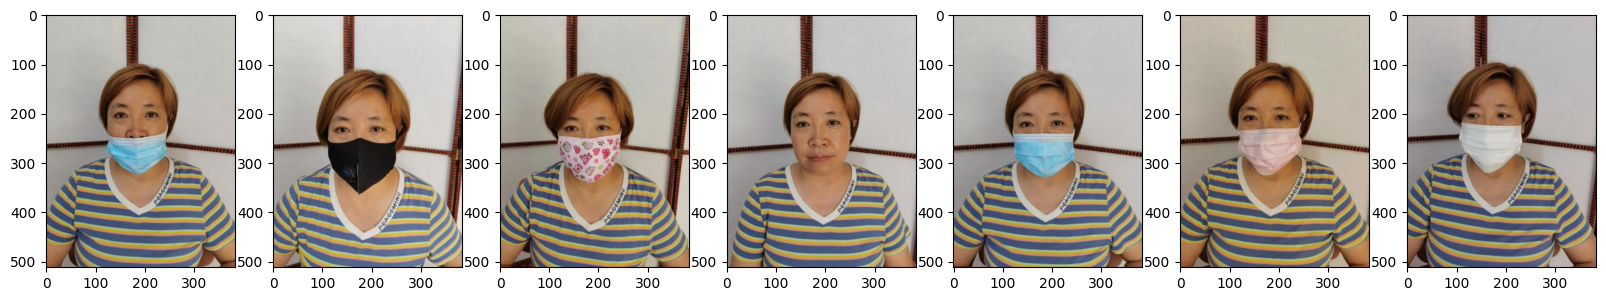

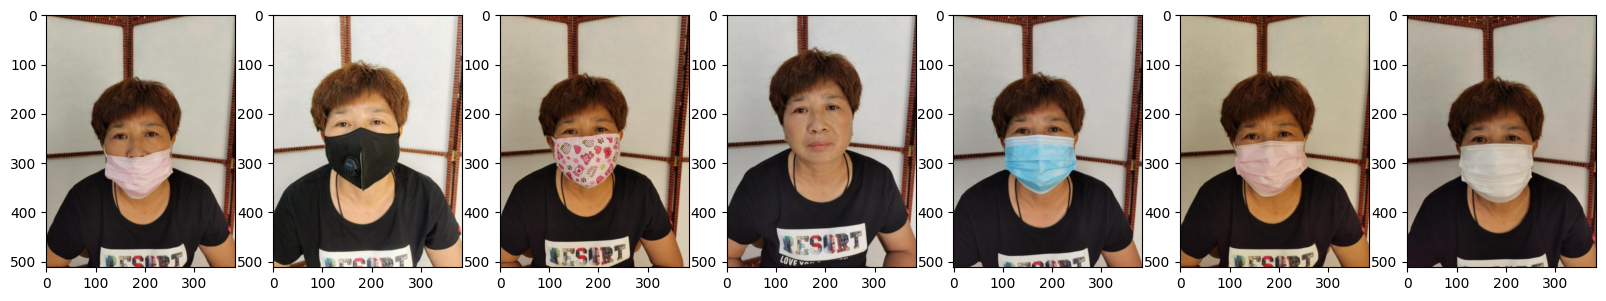

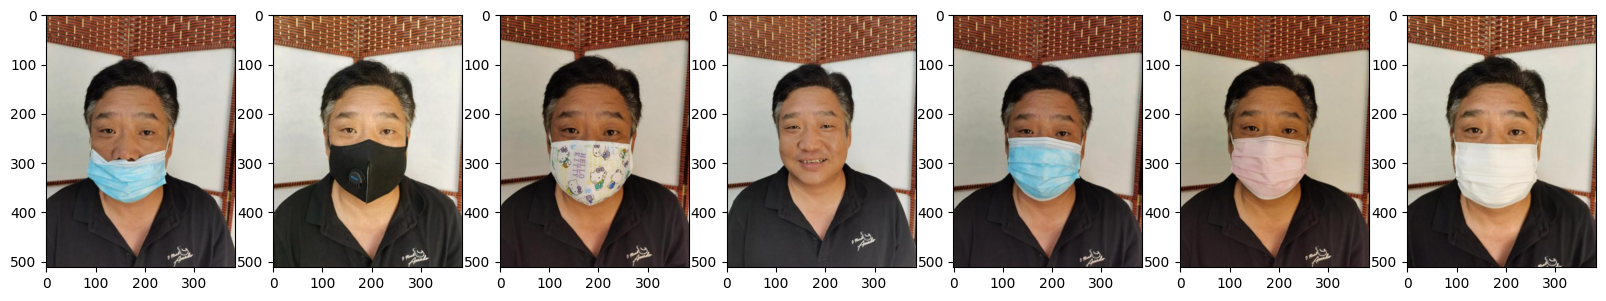

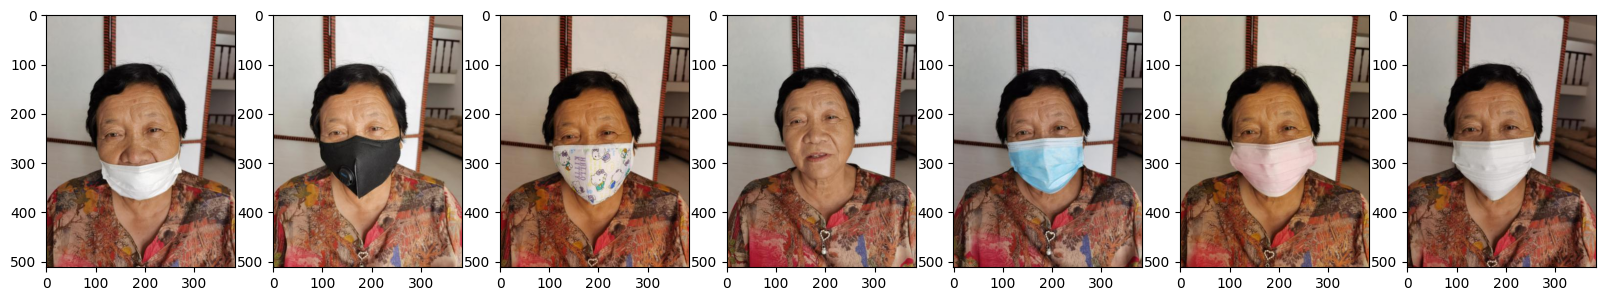

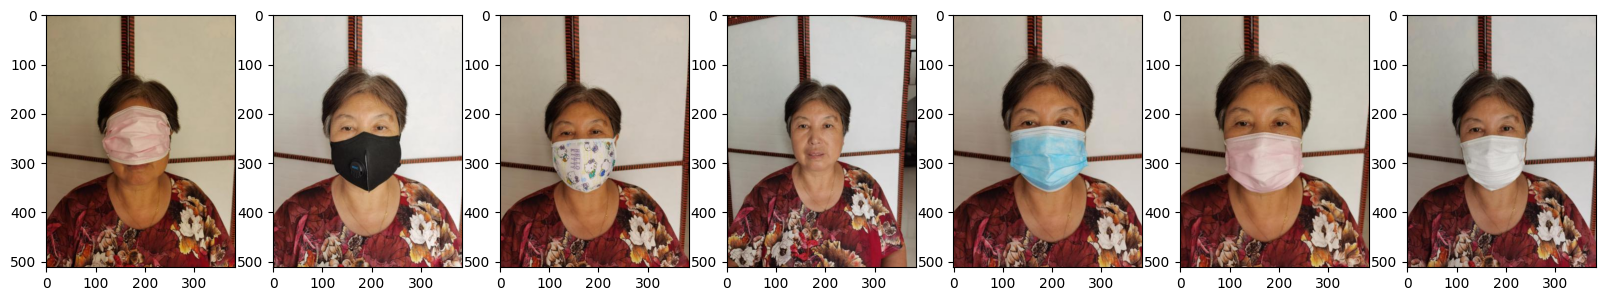

In [28]:
for i in range(5):
    show_photos(i)

----

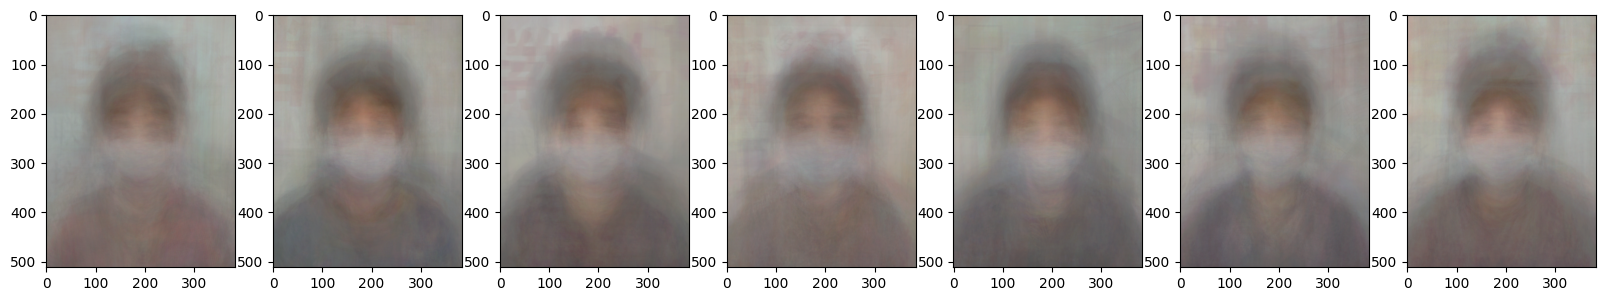

In [63]:
import os
import matplotlib.pyplot as plt
import cv2

def get_files(path):
    for file in os.listdir(path):
        if os.path.isfile(os.path.join(path, file)):
            yield os.path.join(path, file)

plt.figure(figsize=(20,20))
def show_photos(person_id):
    plt.figure(figsize=(20,20))
    columns = 7
    files = list(get_files(train_dir_path + f"images/{train_csv.iloc[person_id]['path']}/"))
    for i, filepath in enumerate(files):
        img = cv2.imread(filepath)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.subplot(((len(files) - 1) // columns) + 1, columns, i + 1)
        plt.imshow(img)

----

In [64]:
eval_dir_path = '../../input/data/eval/'
submissions_csv_path = eval_dir_path + 'submissions_20221026.csv'

In [70]:
import pandas as pd
submissions_csv = pd.read_csv(submissions_csv_path)
#samples = submissions_csv.sample(7)
samples = submissions_csv.head(7)   # TODO : 실제 아웃풋일때는 sample 해서 보기
samples.head()

,ImageID,ans
0,cbc5c6e168e63498590db46022617123f1fe1268.jpg,0
1,0e72482bf56b3581c081f7da2a6180b8792c7089.jpg,1
2,b549040c49190cedc41327748aeb197c1670f14d.jpg,2
3,4f9cb2a045c6d5b9e50ad3459ea7b791eb6e18bc.jpg,3
4,248428d9a4a5b6229a7081c32851b90cb8d38d0c.jpg,4


In [75]:
import os
import matplotlib.pyplot as plt
import cv2

def show_photos(person_id):
    plt.figure(figsize=(20,20))
    columns = 7
    for i, filepath in enumerate(samples):
        print(filepath["ImageID"])
        """
        img = cv2.imread(filepath)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.suptitle("Title for whole figure", fontsize=16)
        plt.subplot(((len(files) - 1) // columns) + 1, columns, i + 1)
        plt.imshow(img)
        """

In [76]:
for i in range(5):
    show_photos(i)

TypeError: string indices must be integers

<Figure size 2000x2000 with 0 Axes>